In [71]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## picked up from Nueral_network 1...

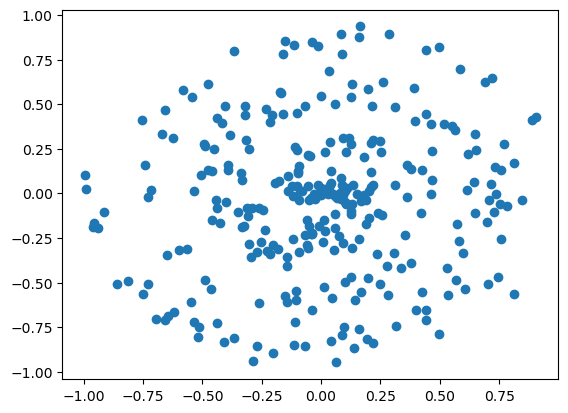

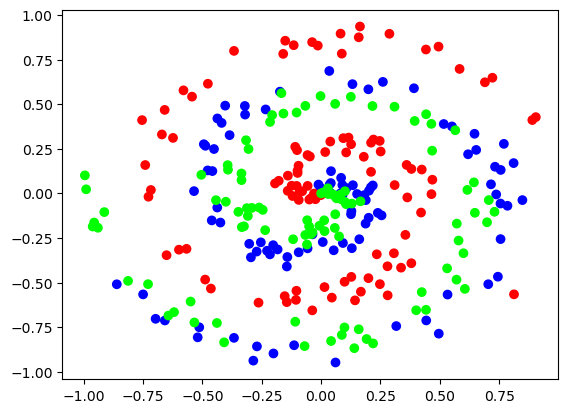

In [82]:
## just finding a sample data set: spiral data...
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)


plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [84]:
## Writing out each layer of weights etc is too inefficient and instead we are going to make an object.

## Now lets add another layer
## convention that 'X' means actual training dataset
np.random.seed(0)


class Layer_Dense:
# first we want random weights between -1 and +1 so that inputs don't get bigger. in a smaller range is better, 
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) # creates a matrix n_inputs(row) by N_neurons(columns) with random numbers from
                                                                # a gaussian distribution (normal) that is then scaled down by 0.1 so nothing is above 1
        self.biases = np.zeros((1, n_neurons)) # doesn't work if not in a tuple.
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.outputs = np.maximum(0, inputs)


layer1 = Layer_Dense(2, 5)
# Number of inputs here is the number of columns in inputs matrix
activation1 = Activation_ReLU()


layer1.forward(X)
activation1.forward(layer1.output)
print(activation1.outputs)

[[0.         0.         0.         0.         0.        ]
 [0.         0.00104089 0.00027106 0.00084425 0.00116002]
 [0.0005214  0.00202513 0.00092534 0.0025146  0.00290383]
 ...
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [107]:
## activation of the output layer is a little different 
## We want a distribution of probabilities from each node that all add up to 1
#] we also need to keep the negative numbers we can't just lose their meaning
# you can do this using y = e**x as even if x is negative y is still a positive number.

#import math
#E = math.e

layer_outputs = [4.8, 1.21, 2.385]
exp_values = np.exp(layer_outputs)

#for outputs in layer_outputs:
    #exp_values.append(E**outputs)

# you then normalise the dataset to get a distribution (see onenote page for the maths)

#norm_base = sum(exp_values)
#norm_values = [value / norm_base for value in exp_values]

norm_values = exp_values / np.sum(exp_values)

print(sum(norm_values)) #should add up to basically 1

0.9999999999999999


In [108]:
# lets try it with a batch

layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]
exp_values = np.exp(layer_outputs)

norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True) # we have to change this layer when doing batch because it sums the whole array and we want three values
# the sum function ---> axis = 0 sums the columns, axis = 1 sums the rows, keepdims=True because we want the sum of each output to be applied in turn.
print(norm_values)
print(sum(norm_values[0]))
## all good!!

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
0.9999999999999999


In [119]:
#add the softmax activation class
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1, n_neurons)) 
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

X, y = spiral_data(points=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])


[[0.33333333 0.33333333 0.33333333]
 [0.33332543 0.33335259 0.33332198]
 [0.33325342 0.33344475 0.33330183]
 [0.33321514 0.33348793 0.33329694]
 [0.33318104 0.33352296 0.333296  ]]
